# Import libraries

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import LocalOutlierFactor

from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import date




In [363]:
housing = pd.read_csv('./input/train.csv',index_col=0).reset_index(drop=True)

## Take a Quick Look at the Data Structure

In [316]:

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [317]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:>

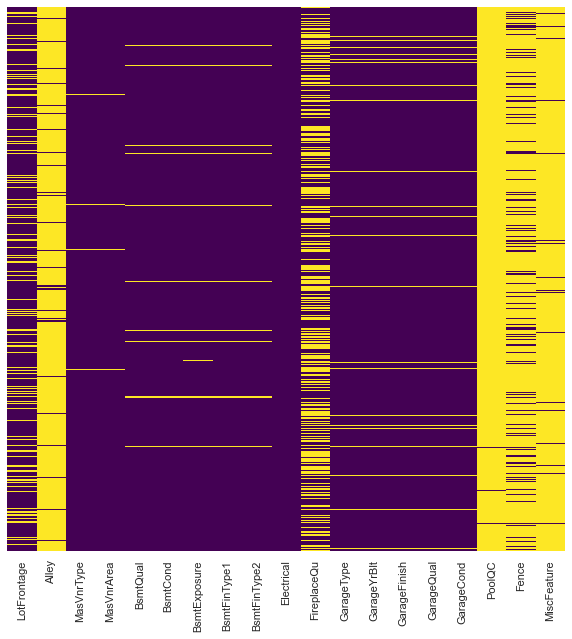

In [318]:
#Check null values in each features with null values
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(housing[housing.columns[housing.isna().any()].tolist()].isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [319]:
housing[housing.columns[housing.isna().any()].tolist()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [320]:
#descriptive statistics summary
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

c:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


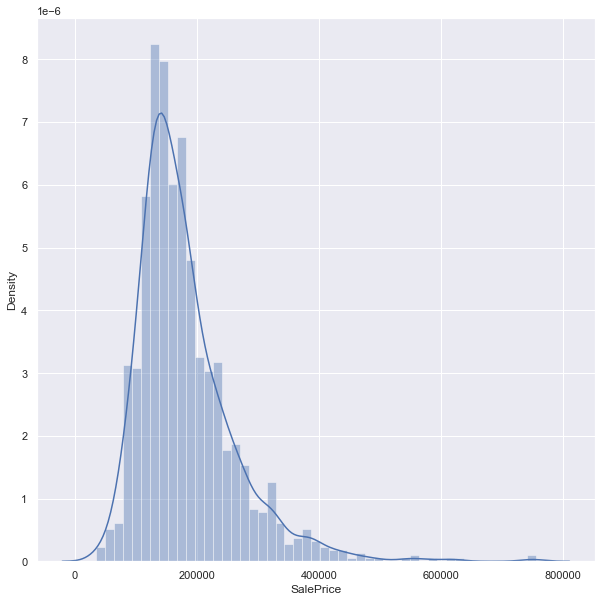

In [321]:
#histogram
sns.distplot(housing['SalePrice']);

In [322]:
#skewness and kurtosis
print("Skewness: %f" % housing['SalePrice'].skew())
print("Kurtosis: %f" % housing['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


c:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


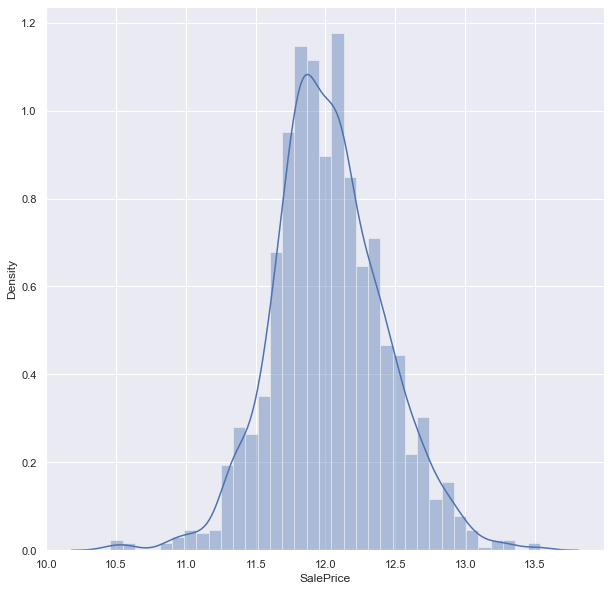

In [323]:
#histogram of log(SalePrice)
sns.distplot(housing['SalePrice'].apply(np.log));

In [324]:
#skewness and kurtosis of log transformed data
print("Skewness: %f" % housing['SalePrice'].apply(np.log).skew())
print("Kurtosis: %f" % housing['SalePrice'].apply(np.log).kurt())


Skewness: 0.121335
Kurtosis: 0.809532


In [325]:
corr_matrix = housing.corr(method='spearman').abs().sort_values(by='SalePrice', ascending=False)
cor_target = abs(corr_matrix["SalePrice"])
#Selecting highly correlated features
num_var = cor_target[cor_target>0.4]
#target variable
target = num_var['SalePrice']
relevant_features = num_var.drop(['SalePrice'])
num_var


SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
GarageArea      0.649379
FullBath        0.635957
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
TotRmsAbvGrd    0.532586
Fireplaces      0.519247
OpenPorchSF     0.477561
LotArea         0.456461
MasVnrArea      0.421309
LotFrontage     0.409076
Name: SalePrice, dtype: float64

C:\Users\agusp\AppData\Local\Temp\ipykernel_1832\992120403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_num['SalePrice'] = housing_num['SalePrice'].apply(np.log)


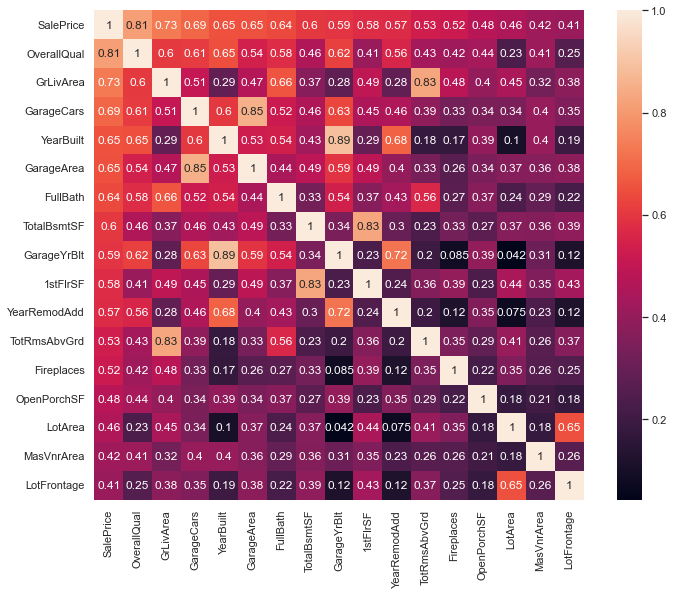

In [326]:
#correlation matrix
housing_num = housing[num_var.index]
# Transform the target variable to log scale
housing_num['SalePrice'] = housing_num['SalePrice'].apply(np.log)
corrmat = housing_num.corr(method='spearman').abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, annot=True);

In [327]:
# Create correlation matrix
housing_num_feat = housing[relevant_features.index]
corr_matrix = housing_num_feat.corr(method='spearman').abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop


C:\Users\agusp\AppData\Local\Temp\ipykernel_1832\3354493348.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['GarageArea', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd']

In [328]:
# Drop highly correlated features
# Drop garage area as it is highly correlated with garage cars and have lower correlation with SalePrice
housing_num.drop(['GarageArea'], axis=1, inplace=True)
# Drop garage year built as it is highly correlated with year built and have lower correlation with SalePrice
housing_num.drop(['GarageYrBlt'], axis=1, inplace=True)
# Drop First Floor square feet as it is highly correlated with Total square feet of basement area and have lower correlation with SalePrice
housing_num.drop(['1stFlrSF'], axis=1, inplace=True)
# Drop Total rooms above grade as it is highly correlated with TAbove grade (ground) living area square feet and have lower correlation with SalePrice
housing_num.drop(['TotRmsAbvGrd'], axis=1, inplace=True)

C:\Users\agusp\AppData\Local\Temp\ipykernel_1832\11916603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_num.drop(['GarageArea'], axis=1, inplace=True)
C:\Users\agusp\AppData\Local\Temp\ipykernel_1832\11916603.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_num.drop(['GarageYrBlt'], axis=1, inplace=True)
C:\Users\agusp\AppData\Local\Temp\ipykernel_1832\11916603.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


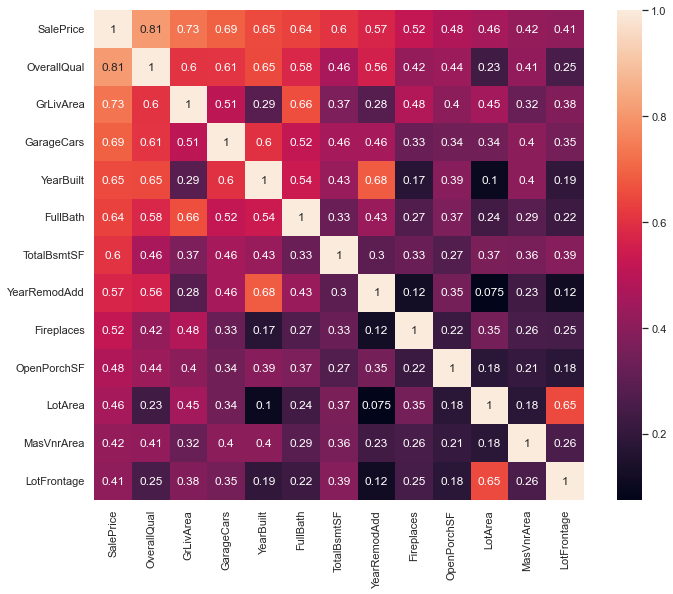

In [329]:
corrmat = housing_num.corr(method='spearman').abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, annot=True);


In [330]:
# Impute the missing values with the KNN algorithm
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(housing_num)
# Create dataframe with data from imputer
housing_num = pd.DataFrame(imputer.transform(housing_num), columns=housing_num.columns)

In [331]:
housing_num.describe(include='all')

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,FullBath,TotalBsmtSF,YearRemodAdd,Fireplaces,OpenPorchSF,LotArea,MasVnrArea,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,12.024051,6.099315,1515.463699,1.767123,1971.267808,1.565068,1057.429452,1984.865753,0.613014,46.660274,10516.828082,104.409247,70.952740
std,0.399452,1.382997,525.480383,0.747315,30.202904,0.550916,438.705324,20.645407,0.644666,66.256028,9981.264932,181.958896,24.556934
min,10.460242,1.000000,334.000000,0.000000,1872.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,1300.000000,0.000000,21.000000
25%,11.775097,5.000000,1129.500000,1.000000,1954.000000,1.000000,795.750000,1967.000000,0.000000,0.000000,7553.500000,0.000000,60.000000
50%,12.001505,6.000000,1464.000000,2.000000,1973.000000,2.000000,991.500000,1994.000000,1.000000,25.000000,9478.500000,0.000000,70.000000
75%,12.273731,7.000000,1776.750000,2.000000,2000.000000,2.000000,1298.250000,2004.000000,1.000000,68.000000,11601.500000,166.000000,80.625000
max,13.534473,10.000000,5642.000000,4.000000,2010.000000,3.000000,6110.000000,2010.000000,3.000000,547.000000,215245.000000,1600.000000,313.000000


In [332]:
# identify outliers in the dataset
clf = LocalOutlierFactor(n_neighbors=2)
clf.fit_predict(housing_num)
# count the number of outliers in the dataset
outliers = pd.Series(clf.negative_outlier_factor_, index=housing_num.index)
# remove the outliers from the dataset  
housing_num = housing_num[clf.negative_outlier_factor_ > -2.5]

In [333]:
housing_num

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,FullBath,TotalBsmtSF,YearRemodAdd,Fireplaces,OpenPorchSF,LotArea,MasVnrArea,LotFrontage
0,12.247694,7.0,1710.0,2.0,2003.0,2.0,856.0,2003.0,0.0,61.0,8450.0,196.0,65.0
1,12.109011,6.0,1262.0,2.0,1976.0,2.0,1262.0,1976.0,1.0,0.0,9600.0,0.0,80.0
2,12.317167,7.0,1786.0,2.0,2001.0,2.0,920.0,2002.0,1.0,42.0,11250.0,162.0,68.0
3,11.849398,7.0,1717.0,3.0,1915.0,1.0,756.0,1970.0,1.0,35.0,9550.0,0.0,60.0
4,12.429216,8.0,2198.0,3.0,2000.0,2.0,1145.0,2000.0,1.0,84.0,14260.0,350.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072541,6.0,1647.0,2.0,1999.0,2.0,953.0,2000.0,1.0,40.0,7917.0,0.0,62.0
1456,12.254863,6.0,2073.0,2.0,1978.0,2.0,1542.0,1988.0,2.0,0.0,13175.0,119.0,85.0
1457,12.493130,7.0,2340.0,1.0,1941.0,2.0,1152.0,2006.0,2.0,60.0,9042.0,0.0,66.0
1458,11.864462,5.0,1078.0,1.0,1950.0,1.0,1078.0,1996.0,0.0,0.0,9717.0,0.0,68.0


In [334]:
housing_num.describe(include='all')

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,FullBath,TotalBsmtSF,YearRemodAdd,Fireplaces,OpenPorchSF,LotArea,MasVnrArea,LotFrontage
count,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000
mean,12.027215,6.106071,1517.973482,1.770412,1971.318911,1.568039,1059.035590,1984.875087,0.612701,46.804606,10586.503140,102.271807,71.275994
std,0.395060,1.373603,520.276627,0.742498,30.244364,0.550277,431.349137,20.621195,0.645163,66.191546,10045.683232,175.555638,24.496367
min,10.460242,1.000000,438.000000,0.000000,1872.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,1300.000000,0.000000,21.000000
25%,11.775290,5.000000,1136.000000,1.000000,1954.000000,1.000000,796.000000,1967.000000,0.000000,0.000000,7630.000000,0.000000,60.000000
50%,12.007622,6.000000,1466.000000,2.000000,1973.000000,2.000000,994.000000,1994.000000,1.000000,25.000000,9503.000000,0.000000,70.000000
75%,12.273731,7.000000,1776.000000,2.000000,2000.000000,2.000000,1302.000000,2004.000000,1.000000,68.000000,11616.000000,164.000000,81.000000
max,13.534473,10.000000,5642.000000,4.000000,2010.000000,3.000000,6110.000000,2010.000000,3.000000,547.000000,215245.000000,1378.000000,313.000000


In [335]:
# Calculte the mutual information scores for each feature
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X_train = housing_num.loc[:, housing_num.columns != 'SalePrice']
y_train=housing_num['SalePrice']
mi_scores = make_mi_scores(X_train, y_train)
mi_scores[::3]  # show a few features with their MI scores

OverallQual     0.557628
TotalBsmtSF     0.365844
YearRemodAdd    0.240970
OpenPorchSF     0.158743
Name: MI Scores, dtype: float64

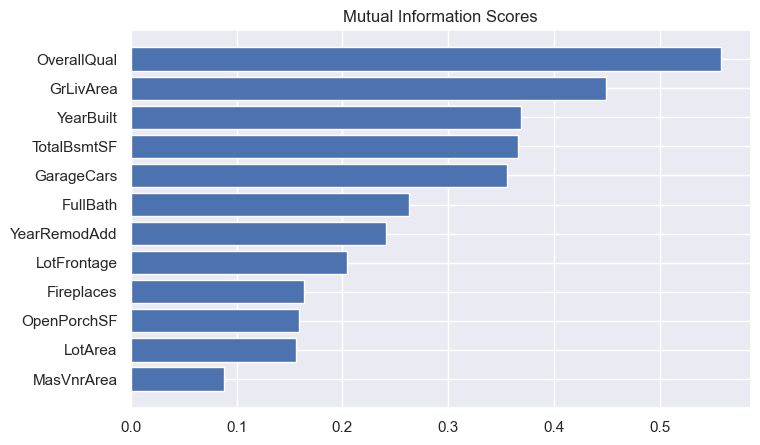

In [336]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [337]:
#Compute VIF data for each independent variable


features = housing_num.drop(['SalePrice'], axis=1)

vif = pd.DataFrame()
vif["features"] = features.columns
vif["vif_Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif

,features,vif_Factor
0,OverallQual,50.248268
1,GrLivArea,26.073090
2,GarageCars,11.850613
3,YearBuilt,8472.051553
4,FullBath,17.967002
5,TotalBsmtSF,11.854207
6,YearRemodAdd,8308.728854
7,Fireplaces,2.639695
8,OpenPorchSF,1.738188
9,LotArea,2.673323


In [338]:
# Transforming the Year build to years old and dropping the original column and the year remodelled as it is highly correlated with year built
features = housing_num.drop(['SalePrice'], axis=1)
features['YearOld'] = features['YearBuilt'] - date.today().year
features['TotGrArea'] = features['GrLivArea'] + features['TotalBsmtSF']
# Dropping the LotFrontage as it is highly correlated with LotArea and have lower correlation with SalePrice
features = features.drop(['YearBuilt','YearRemodAdd','LotFrontage','GrLivArea','TotalBsmtSF'], axis=1)

vif = pd.DataFrame()
vif["features"] = features.columns
vif["vif_Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif

,features,vif_Factor
0,OverallQual,30.571241
1,GarageCars,11.947450
2,FullBath,15.309530
3,Fireplaces,2.495399
4,OpenPorchSF,1.718782
5,LotArea,2.449412
6,MasVnrArea,1.781604
7,YearOld,3.175368
8,TotGrArea,29.664228


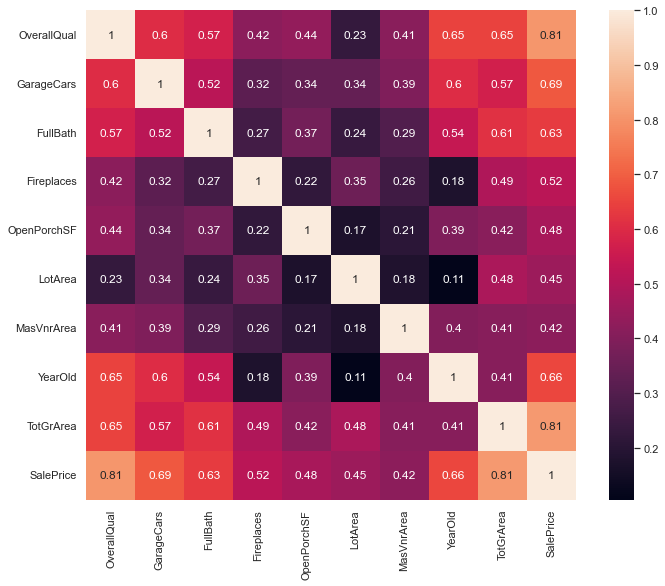

In [339]:
features['SalePrice'] = housing_num['SalePrice']
corrmat = features.corr(method='spearman').abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, annot=True);

In [340]:
# Removing variables in housing_num
housing_num['YearOld'] = housing_num['YearBuilt'] - date.today().year
housing_num['TotGrArea'] = housing_num['GrLivArea'] + housing_num['TotalBsmtSF']
housing_num = housing_num.drop(['YearBuilt','YearRemodAdd','LotFrontage','GrLivArea','TotalBsmtSF'], axis=1)


In [341]:
# Get the categorical features
housing_cat = housing.select_dtypes(include=['object'])
housing_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [342]:
housing_cat.describe(include='all')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [343]:
housing_cat.isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [344]:
# Impute the missing values with None from data description
housing_cat = housing_cat.fillna('None')

In [345]:
housing_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [346]:
# Encode the categorical features into numerical features with ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
# Columns to encode
colums_ord= ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','BsmtFinType1','BsmtFinType2','Functional','GarageFinish','Fence','LandSlope','LotShape','PavedDrive']
ordinal_encoder = OrdinalEncoder()
housing_cat_ord = housing_cat[colums_ord]
housing_cat_encoded_ord = ordinal_encoder.fit_transform(housing_cat_ord)
housing_cat_encoded_ord = pd.DataFrame(housing_cat_encoded_ord, columns=housing_cat_ord.columns)

In [347]:
housing_cat.drop(colums_ord, axis=1, inplace=True)
housing_cat=pd.concat([housing_cat, housing_cat_encoded_ord], axis=1)

In [348]:
housing_cat

,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,GarageCond,PoolQC,BsmtFinType1,BsmtFinType2,Functional,GarageFinish,Fence,LandSlope,LotShape,PavedDrive
0,RL,Pave,None,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,...,5.0,3.0,2.0,6.0,6.0,2.0,4.0,0.0,3.0,2.0
1,RL,Pave,None,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,...,5.0,3.0,0.0,6.0,6.0,2.0,4.0,0.0,3.0,2.0
2,RL,Pave,None,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,...,5.0,3.0,2.0,6.0,6.0,2.0,4.0,0.0,0.0,2.0
3,RL,Pave,None,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,...,5.0,3.0,0.0,6.0,6.0,3.0,4.0,0.0,0.0,2.0
4,RL,Pave,None,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,...,5.0,3.0,2.0,6.0,6.0,2.0,4.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Lvl,AllPub,Inside,Gilbert,Norm,Norm,1Fam,...,5.0,3.0,6.0,6.0,6.0,2.0,4.0,0.0,3.0,2.0
1456,RL,Pave,None,Lvl,AllPub,Inside,NWAmes,Norm,Norm,1Fam,...,5.0,3.0,0.0,5.0,2.0,3.0,2.0,0.0,3.0,2.0
1457,RL,Pave,None,Lvl,AllPub,Inside,Crawfor,Norm,Norm,1Fam,...,5.0,3.0,2.0,6.0,6.0,2.0,0.0,0.0,3.0,2.0
1458,RL,Pave,None,Lvl,AllPub,Inside,NAmes,Norm,Norm,1Fam,...,5.0,3.0,2.0,5.0,6.0,3.0,4.0,0.0,3.0,2.0


In [349]:
# select rest of the columns to encode type object
columns_one = housing_cat.select_dtypes(include=['object']).columns
# Encode the categorical features into numerical features with one hot encoding
one_hot_encoder = OneHotEncoder()
housing_cat_one = housing_cat[columns_one]
housing_cat_encoded_one = one_hot_encoder.fit_transform(housing_cat_one)
housing_cat_encoded_one = pd.DataFrame(housing_cat_encoded_one.toarray(), columns=one_hot_encoder.get_feature_names(columns_one))
# concat the encoded columns with the original dataframe
housing_cat.drop(columns_one, axis=1, inplace=True)
housing_cat_encoded=pd.concat([housing_cat, housing_cat_encoded_one], axis=1)


c:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [350]:
housing_cat

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,BsmtFinType1,BsmtFinType2,Functional,GarageFinish,Fence,LandSlope,LotShape,PavedDrive
0,2.0,4.0,2.0,4.0,0.0,2.0,3.0,5.0,5.0,3.0,2.0,6.0,6.0,2.0,4.0,0.0,3.0,2.0
1,3.0,4.0,2.0,4.0,0.0,3.0,5.0,5.0,5.0,3.0,0.0,6.0,6.0,2.0,4.0,0.0,3.0,2.0
2,2.0,4.0,2.0,4.0,0.0,2.0,5.0,5.0,5.0,3.0,2.0,6.0,6.0,2.0,4.0,0.0,0.0,2.0
3,3.0,4.0,4.0,1.0,2.0,2.0,2.0,5.0,5.0,3.0,0.0,6.0,6.0,3.0,4.0,0.0,0.0,2.0
4,2.0,4.0,2.0,4.0,0.0,2.0,5.0,5.0,5.0,3.0,2.0,6.0,6.0,2.0,4.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,4.0,2.0,4.0,0.0,3.0,5.0,5.0,5.0,3.0,6.0,6.0,6.0,2.0,4.0,0.0,3.0,2.0
1456,3.0,4.0,2.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,0.0,5.0,2.0,3.0,2.0,0.0,3.0,2.0
1457,0.0,2.0,4.0,1.0,0.0,2.0,2.0,5.0,5.0,3.0,2.0,6.0,6.0,2.0,0.0,0.0,3.0,2.0
1458,3.0,4.0,4.0,4.0,2.0,2.0,3.0,5.0,5.0,3.0,2.0,5.0,6.0,3.0,4.0,0.0,3.0,2.0


In [351]:
housing_cat_encoded

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.0,4.0,2.0,4.0,0.0,2.0,3.0,5.0,5.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,4.0,2.0,4.0,0.0,3.0,5.0,5.0,5.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,4.0,2.0,4.0,0.0,2.0,5.0,5.0,5.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,4.0,4.0,1.0,2.0,2.0,2.0,5.0,5.0,3.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2.0,4.0,2.0,4.0,0.0,2.0,5.0,5.0,5.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,4.0,2.0,4.0,0.0,3.0,5.0,5.0,5.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,3.0,4.0,2.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,2.0,4.0,1.0,0.0,2.0,2.0,5.0,5.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,3.0,4.0,4.0,4.0,2.0,2.0,3.0,5.0,5.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [352]:
# Add the sale price to the encoded categorical features
housing_cat_encoded['SalePrice'] = housing_num['SalePrice']
# remove rows with missing values
housing_cat_encoded = housing_cat_encoded.dropna()
housing_cat_encoded

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,2.0,4.0,2.0,4.0,0.0,2.0,3.0,5.0,5.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.247694
1,3.0,4.0,2.0,4.0,0.0,3.0,5.0,5.0,5.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.109011
2,2.0,4.0,2.0,4.0,0.0,2.0,5.0,5.0,5.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.317167
3,3.0,4.0,4.0,1.0,2.0,2.0,2.0,5.0,5.0,3.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,11.849398
4,2.0,4.0,2.0,4.0,0.0,2.0,5.0,5.0,5.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,4.0,2.0,4.0,0.0,3.0,5.0,5.0,5.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.072541
1456,3.0,4.0,2.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.254863
1457,0.0,2.0,4.0,1.0,0.0,2.0,2.0,5.0,5.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.493130
1458,3.0,4.0,4.0,4.0,2.0,2.0,3.0,5.0,5.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.864462


In [353]:
# Select the best features with random forest


select = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold=-np.inf, max_features=25)
select.fit(housing_cat_encoded.drop('SalePrice',axis=1), housing_cat_encoded['SalePrice'])

# Get the selected features
selected_features = select.get_support()
selected_features_names = housing_cat_encoded.drop('SalePrice',axis=1).columns[selected_features]



In [354]:
selected_features_names


Index(['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
       'GarageQual', 'GarageCond', 'BsmtFinType1', 'GarageFinish', 'LotShape',
       'PavedDrive', 'MSZoning_C (all)', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'BldgType_1Fam',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'BsmtExposure_Gd',
       'CentralAir_N', 'CentralAir_Y', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageType_None'],
      dtype='object')

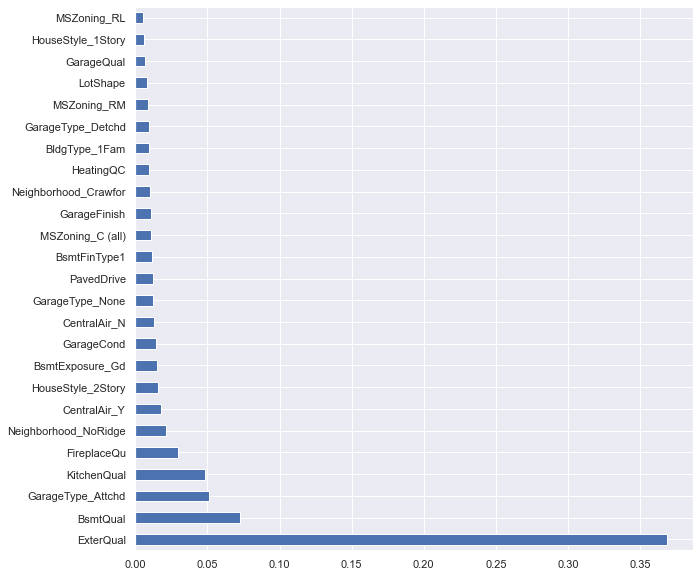

In [355]:
# Plot the feature importance
feature_importances = pd.Series(select.estimator_.feature_importances_, index=housing_cat_encoded.drop('SalePrice',axis=1).columns)
feature_importances.nlargest(25).plot(kind='barh', figsize=(10,10));

In [356]:
housing_cat = housing_cat_encoded[selected_features_names]
housing_cat['SalePrice'] = housing_cat_encoded['SalePrice']

C:\Users\agusp\AppData\Local\Temp\ipykernel_1832\1076951067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_cat['SalePrice'] = housing_cat_encoded['SalePrice']


In [357]:
# Concatenate the numerical and categorical features
housing_transformed = pd.concat([housing_num, housing_cat], axis=1)
housing_transformed.reset_index(drop=True, inplace=True)
housing_transformed = housing_transformed.loc[:,~housing_transformed.columns.duplicated()].copy()

In [358]:
housing_transformed

,SalePrice,OverallQual,GarageCars,FullBath,Fireplaces,OpenPorchSF,LotArea,MasVnrArea,YearOld,TotGrArea,...,Neighborhood_NoRidge,BldgType_1Fam,HouseStyle_1Story,HouseStyle_2Story,BsmtExposure_Gd,CentralAir_N,CentralAir_Y,GarageType_Attchd,GarageType_Detchd,GarageType_None
0,12.247694,7.0,2.0,2.0,0.0,61.0,8450.0,196.0,-19.0,2566.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,12.109011,6.0,2.0,2.0,1.0,0.0,9600.0,0.0,-46.0,2524.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,12.317167,7.0,2.0,2.0,1.0,42.0,11250.0,162.0,-21.0,2706.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,11.849398,7.0,3.0,1.0,1.0,35.0,9550.0,0.0,-107.0,2473.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,12.429216,8.0,3.0,2.0,1.0,84.0,14260.0,350.0,-22.0,3343.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,12.072541,6.0,2.0,2.0,1.0,40.0,7917.0,0.0,-23.0,2600.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1429,12.254863,6.0,2.0,2.0,2.0,0.0,13175.0,119.0,-44.0,3615.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1430,12.493130,7.0,1.0,2.0,2.0,60.0,9042.0,0.0,-81.0,3492.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1431,11.864462,5.0,1.0,1.0,0.0,0.0,9717.0,0.0,-72.0,2156.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [359]:
housing_transformed.columns

Index(['SalePrice', 'OverallQual', 'GarageCars', 'FullBath', 'Fireplaces',
       'OpenPorchSF', 'LotArea', 'MasVnrArea', 'YearOld', 'TotGrArea',
       'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
       'GarageQual', 'GarageCond', 'BsmtFinType1', 'GarageFinish', 'LotShape',
       'PavedDrive', 'MSZoning_C (all)', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'BldgType_1Fam',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'BsmtExposure_Gd',
       'CentralAir_N', 'CentralAir_Y', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageType_None'],
      dtype='object')

In [361]:
# The final features in housing_transformed are:
num_feat = ['SalePrice', 'OverallQual', 'GarageCars', 'FullBath', 'Fireplaces','OpenPorchSF', 'LotArea', 'MasVnrArea', 'YearBuilt', 'GrLivArea','TotalBsmtSF']
cat_feat_one_hot = ['MSZoning','Neighborhood','GarageType','CentralAir','HouseStyle','BsmtExposure']
cat_feat_ord = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu','GarageQual', 'GarageCond', 'BsmtFinType1', 'GarageFinish', 'LotShape','PavedDrive']

In [364]:
# Create custom transformer for the numerical features

class VariableTransformer(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        # Create new feature Year Old
        X.loc[:,'YearBuilt'] = date.today().year - X['YearBuilt'].values
        # Create new feature TotGrArea
        X.loc[:,'GrLivArea'] = X.loc[:,'GrLivArea'] + X.loc[:,'TotalBsmtSF']
        # Drop the other features
        X = X.drop(['TotalBsmtSF'], axis=1)
        # Transform sale price to log scale
        X['SalePrice'] = X['SalePrice'].apply(np.log)
        return X.values


In [365]:
# Create another transformer for outlier detection with LOF

class OutlierRemoval(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        # create new feature for outlier detection
        # remove the outliers with LOF
        # return the dataframe without the outliers
        # return X.values
        lof = LocalOutlierFactor(n_neighbors=2)
        lof.fit(X)
        outliers = lof.negative_outlier_factor_ < -2.5
        # set the outliers to nan
        X[outliers] = np.nan
        return X

In [367]:
# create pipeline for the numeric data

num_pipeline = Pipeline([
        ('attribs_adder', VariableTransformer()),
        ('imputer', KNNImputer(n_neighbors=2, weights="uniform")),
        ('outlier_remover', OutlierRemoval()),
        
    ])

In [370]:
# create categorical pipeline for one hot encoding

cat_pipeline_one = Pipeline([
        ('imputer_cat', SimpleImputer(strategy="constant", fill_value="None")),
        ('one_hot_encoding', OneHotEncoder(sparse=False)),
        
    ])

In [371]:
# create categorical pipeline for ordinal encoding

cat_pipeline_ord = Pipeline([
        ('imputer_cat', SimpleImputer(strategy="constant", fill_value="None")),
        ('ord_encoding', OrdinalEncoder()),
        
    ])


In [372]:
# Create a full pipeline for the numerical and categorical features

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_feat),
        ("cat one", cat_pipeline_one, cat_feat_one_hot),
        ("cat ord", cat_pipeline_ord, cat_feat_ord),
    ])
# Transform the data
housing_prepared = full_pipeline.fit_transform(housing)
# Drop nan values where the outliers were stored
housing_prepared = housing_prepared[~np.isnan(housing_prepared).any(axis=1)]


In [379]:
# Split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(housing_prepared[:,1:], housing_prepared[:,0], test_size=0.3, random_state=42)

In [380]:
# Scale the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [381]:
# Create a random forest model with gridsearchCV


param = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt', 'log2']}
forest_reg = RandomForestRegressor()
grid_search_rf = GridSearchCV(forest_reg, param, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(grid_search_rf.best_params_)
print("Error Training Set: ",np.exp(-grid_search_rf.best_score_))
print("Error Test Set: ", np.exp(-grid_search_rf.score(X_test, y_test)))




{'max_features': 'auto', 'n_estimators': 100}
Error Training Set:  1.0215713494170853
Error Test Set:  1.022496539775984


In [382]:
# Create a XGBoost model with gridsearchCV


param = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
xgb_reg = XGBRegressor()
grid_search_xg = GridSearchCV(xgb_reg, param, cv=5, scoring='neg_mean_squared_error')
grid_search_xg.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(grid_search_xg.best_params_)
print("Error Training Set: ",np.exp(-grid_search_xg.best_score_))
print("Error Test Set: ", np.exp(-grid_search_xg.score(X_test, y_test)))

{'max_depth': 3, 'n_estimators': 80}
Error Training Set:  1.018356480549218
Error Test Set:  1.0223953979025067


In [383]:
# Create a Lasso model with gridsearchCV


param = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso_reg = Lasso()
grid_search_lasso = GridSearchCV(lasso_reg, param, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(grid_search_lasso.best_params_)
print("Error Training Set: ",np.exp(-grid_search_lasso.best_score_))
print("Error Test Set: ", np.exp(-grid_search_lasso.score(X_test, y_test)))


{'alpha': 0.001}
Error Training Set:  1.0250943783643944
Error Test Set:  1.0194423292329846


In [390]:
# Create a Ridge model with gridsearchCV



param = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge_reg = Ridge()
grid_search_ridge = GridSearchCV(ridge_reg, param, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

# Print the best parameters and the corresponding score

print(grid_search_ridge.best_params_)
print("Error Training Set: ",np.exp(-grid_search_ridge.best_score_))
print("Error Test Set: ", np.exp(-grid_search_ridge.score(X_test, y_test)))


{'alpha': 100}
Error Training Set:  1.0245519314363256
Error Test Set:  1.0198643342844038
